# Feature Importtance

In [1]:
import numpy as np
import pandas as pd

In [2]:
read = pd.read_csv("/home/vikas/Downloads/titanic.csv")
read.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def process_titaninc(dataframe):
    df = dataframe.copy()
    ## preprocessing
    df['family_size'] = df.SibSp + df.Parch + 1
    df['is_alone'] = (df.family_size == 0)#.astype('int')
    df['has_cabin'] = df.Cabin.notnull()
#     df['fare_per_person'] = df.Fare/df.family_size
    
    ## encoding categorical features
    df.drop('Cabin', axis=1, inplace=True)
    df.Sex = df.Sex.astype('category').cat.codes
    df.Embarked = df.Embarked.astype('category').cat.codes
    df.Name = df.Name.astype('category').cat.codes
    
    ## Processing tickets
    df.Ticket = df.Ticket.str.split(' ').str[-1]
    
    ## Handling Missing values
    df['Age_p'] = df.Age.isnull() # adding an extra column indicating whether the value are present or not.
    df.loc[df.Age.isnull(), 'Age'] = df.Age.mean()
    df.Age = df.Age.astype('int')
    
    ## Dropping recordes 
    df.drop(df.loc[df.Ticket == 'LINE'].index, axis=0, inplace=True)
    
    return df.drop('Survived', axis=1), df.Survived

In [4]:
x, y = process_titaninc(read)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x.drop('Name',axis = 1,inplace = True)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 10)

In [8]:
from  sklearn.ensemble import RandomForestClassifier

In [9]:
clf = RandomForestClassifier()

In [10]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
clf.score(x_train,y_train),clf.score(x_test,y_test)

(0.98548387096774193, 0.8314606741573034)

# Feature Importance

In [12]:
clf.feature_importances_

array([ 0.14191134,  0.06594105,  0.22957767,  0.10749912,  0.02731075,
        0.01189583,  0.16831503,  0.12583093,  0.02312096,  0.05508809,
        0.        ,  0.03325769,  0.01025153])

In [13]:
Feature_Importance =pd.DataFrame({'importance':clf.feature_importances_}) 
Feature_Importance

,importance
0,0.141911
1,0.065941
2,0.229578
3,0.107499
4,0.027311
5,0.011896
6,0.168315
7,0.125831
8,0.023121
9,0.055088


In [14]:
Feature_Importance =pd.DataFrame({'importance':clf.feature_importances_},index=x.columns ) 
Feature_Importance

,importance
PassengerId,0.141911
Pclass,0.065941
Sex,0.229578
Age,0.107499
SibSp,0.027311
Parch,0.011896
Ticket,0.168315
Fare,0.125831
Embarked,0.023121
family_size,0.055088


In [15]:
Feature_Importance =pd.DataFrame({'importance':clf.feature_importances_},index=x.columns).sort_values('importance') 
Feature_Importance

,importance
is_alone,0.000000
Age_p,0.010252
Parch,0.011896
Embarked,0.023121
SibSp,0.027311
has_cabin,0.033258
family_size,0.055088
Pclass,0.065941
Age,0.107499
Fare,0.125831


In [16]:
Feature_Importance['importance']

is_alone       0.000000
Age_p          0.010252
Parch          0.011896
Embarked       0.023121
SibSp          0.027311
has_cabin      0.033258
family_size    0.055088
Pclass         0.065941
Age            0.107499
Fare           0.125831
PassengerId    0.141911
Ticket         0.168315
Sex            0.229578
Name: importance, dtype: float64

# we checked the imporatnt feature from data

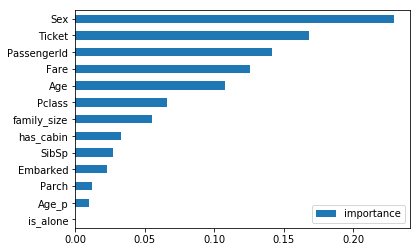

In [17]:

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# import seaborn as sb
# import matplotlib.pyplot  as plt
# Feature_Importance.iloc[:].plot(kind = 'kde')
Feature_Importance.plot.barh()

# these features r importnat from train the model

In [18]:
Feature_Importance[Feature_Importance.importance >0.05] 

,importance
family_size,0.055088
Pclass,0.065941
Age,0.107499
Fare,0.125831
PassengerId,0.141911
Ticket,0.168315
Sex,0.229578


# these imp feature use for reference 

In [19]:
to_keep = Feature_Importance[Feature_Importance.importance >0.05] 
to_keep

,importance
family_size,0.055088
Pclass,0.065941
Age,0.107499
Fare,0.125831
PassengerId,0.141911
Ticket,0.168315
Sex,0.229578


# Feature Importance Using LOFO (Leave one feature out)

In [20]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,is_alone,has_cabin,Age_p
0,1,3,1,22,1,0,21171,7.2500,2,2,False,False,False
1,2,1,0,38,1,0,17599,71.2833,0,2,False,True,False
2,3,3,0,26,0,0,3101282,7.9250,2,1,False,False,False
3,4,1,0,35,1,0,113803,53.1000,2,2,False,True,False
4,5,3,1,35,0,0,373450,8.0500,2,1,False,False,False


In [21]:
x.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'family_size', 'is_alone', 'has_cabin', 'Age_p'],
      dtype='object')

In [22]:
to_keep.index

Index(['family_size', 'Pclass', 'Age', 'Fare', 'PassengerId', 'Ticket', 'Sex'], dtype='object')

In [23]:
x =x[to_keep.index]

In [24]:
x.head()

,family_size,Pclass,Age,Fare,PassengerId,Ticket,Sex
0,2,3,22,7.2500,1,21171,1
1,2,1,38,71.2833,2,17599,0
2,1,3,26,7.9250,3,3101282,0
3,2,1,35,53.1000,4,113803,0
4,1,3,35,8.0500,5,373450,1


In [25]:
x,y = process_titaninc(read) 
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,is_alone,has_cabin,Age_p
0,1,3,108,1,22,1,0,21171,7.2500,2,2,False,False,False
1,2,1,190,0,38,1,0,17599,71.2833,0,2,False,True,False
2,3,3,353,0,26,0,0,3101282,7.9250,2,1,False,False,False
3,4,1,272,0,35,1,0,113803,53.1000,2,2,False,True,False
4,5,3,15,1,35,0,0,373450,8.0500,2,1,False,False,False


In [26]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state =10,test_size = 0.2)

In [28]:
clf =RandomForestClassifier()

In [29]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
clf.score(x_train,y_train),clf.score(x_test,y_test)

(0.98448519040902682, 0.84269662921348309)

In [31]:
results = {}
for col in x.columns:
    temp_x = x.drop(col,axis=1)
    X_train, X_test, y_train, y_test = train_test_split(temp_x,y, test_size = 0.2)
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
#   print(f'dropped {col}: train_score - {clf.score(X_train,y_train):.3f}, test_score - {clf.score(X_test, y_test):.3f}')
    results[col] = [clf.score(X_train,y_train), clf.score(X_test, y_test)]

In [32]:
pd.DataFrame(results).T.sort_values(by=1)

,0,1
Sex,0.984485,0.696629
Ticket,0.991537,0.792135
Embarked,0.984485,0.797753
PassengerId,0.981664,0.803371
has_cabin,0.981664,0.803371
Age,0.984485,0.808989
SibSp,0.983075,0.808989
family_size,0.988717,0.820225
Pclass,0.984485,0.825843
Parch,0.983075,0.842697


In [33]:
pd.DataFrame(results).T.sort_values(by=0)

,0,1
Age_p,0.980254,0.859551
PassengerId,0.981664,0.803371
has_cabin,0.981664,0.803371
Parch,0.983075,0.842697
SibSp,0.983075,0.808989
Age,0.984485,0.808989
Embarked,0.984485,0.797753
Pclass,0.984485,0.825843
Sex,0.984485,0.696629
family_size,0.988717,0.820225


# More Efficient Method (ramdomly suffling the values)

In [34]:
#x,y = process_read(read)
x,y = process_titaninc(read) 

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size = 0.2)

In [36]:
from sklearn.svm import SVC

In [41]:
clf = SVC()
clf.fit(x_train, y_train)
clf.score(x_train,y_train), clf.score(x_test, y_test)

(1.0, 0.6685393258426966)

In [42]:
results ={}
for name, col in x_train.items():
    temp_x_train = x_train.copy()
    temp_x_train[name] = np.random.permutation(col)
#     print(f'{name} shuffled: Train_score: {clf.score(temp_x_train, y_train):.3f}')
    results[name]= clf.score(temp_x_train, y_train)

In [43]:
pd.Series(results).sort_values()

Name           0.603667
Ticket         0.603667
PassengerId    0.612130
Age            0.654443
Fare           0.667137
family_size    0.970381
SibSp          0.988717
Parch          0.994358
Age_p          1.000000
Embarked       1.000000
Pclass         1.000000
Sex            1.000000
has_cabin      1.000000
is_alone       1.000000
dtype: float64

In [78]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
from sklearn.metrics import confusion_matrix,classification_report

# second time mistake 

In [77]:
print(classification_report(x_test,y_test))

TypeError: '<' not supported between instances of 'bool' and 'str'

# corrected solution

In [79]:
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          0       1.00      0.67      0.80       178
          1       0.00      0.00      0.00         0

avg / total       1.00      0.67      0.80       178



/home/vikas/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [55]:
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,is_alone,has_cabin,Age_p
823,824,3,550,0,27,0,1,392096,12.4750,2,2,False,True,False
728,729,2,115,1,25,1,0,236853,26.0000,2,2,False,False,False
387,388,2,118,0,36,0,0,27849,13.0000,2,1,False,False,False
192,193,3,20,0,19,1,0,350046,7.8542,2,2,False,False,False
539,540,1,266,0,22,0,2,13568,49.5000,0,3,False,True,False


In [74]:
x_test.shape#.iloc[:,14].sum()

(178, 14)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [87]:
#x,y = process_titanic(read)
x,y = process_titaninc(read) 

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 10)

In [89]:
Lr = LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
Lr.predict(x_test)

array([ 0.69632413,  0.24866756,  0.713412  ,  0.6359773 ,  1.11707632,
        0.50507581,  0.081959  ,  0.23110868,  0.31028185,  0.73580048,
        1.06309429,  0.91843045,  0.57267423,  0.46181706,  0.28357882,
       -0.10540296,  0.21218082,  0.11794463,  0.02751342,  0.13596717,
        0.17383922,  0.54469337,  0.46153895,  0.30004194,  0.63179918,
        0.14305957,  0.17984443,  0.27106232,  0.58783363,  1.01782852,
        0.25063206, -0.07718594,  0.19190776,  0.18361662,  0.71751221,
        1.06605373,  0.58572065,  0.50368748,  0.34238282,  0.24549629,
        0.09980094,  0.53313487,  0.05065782,  0.39054124,  0.08488035,
       -0.05864956,  0.15061563,  0.68471911,  1.16889446,  0.1596667 ,
        0.49486716,  0.03689186,  0.83086999,  0.11333343,  0.61452646,
        1.04623004,  0.11490172,  0.43749004,  0.34943535,  0.69941543,
        0.94415065,  0.05178398,  0.1885999 ,  0.11456993,  0.04051298,
        0.25906768,  0.48106768,  0.69153519,  0.00458539,  0.59

In [92]:
Lr.score(x_train,y_train),Lr.score(x_test,y_test)

(0.41876886722933282, 0.33076759958643476)

In [93]:
results ={}
for name, col in x_train.items():
    temp_x_train = x_train.copy()
    temp_x_train[name] = np.random.permutation(col)
#     print(f'{name} shuffled: Train_score: {clf.score(temp_x_train, y_train):.3f}')
    results[name]= clf.score(temp_x_train, y_train)

In [95]:
pd.Series(results).sort_values()

PassengerId    0.603667
Name           0.605078
Ticket         0.609309
Fare           0.660085
Age            0.665726
family_size    0.967560
SibSp          0.991537
Parch          0.994358
Age_p          1.000000
Embarked       1.000000
Pclass         1.000000
Sex            1.000000
has_cabin      1.000000
is_alone       1.000000
dtype: float64